In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json
%matplotlib inline

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
cities_df= pd.DataFrame(np.array(cities))
cities_df.columns = ['City']
# Print the city count to confirm sufficient count
len(cities_df)
# set up additional columns to hold information
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lon'] = ""
cities_df['MaxTemp'] = ""
cities_df['WindSpeed'] = ""

cities_df.count()

City          627
Cloudiness    627
Country       627
Date          627
Humidity      627
Lat           627
Lon           627
MaxTemp       627
WindSpeed     627
dtype: int64

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []    
Date = []          
Humidity = []      
Lat = []           
Lon = []           
MaxTemp = []      
WindSpeed = []

# Loop through the list of cities and perform a request for data on each
for index in range(len(cities)):
    
    city = cities[index]
    
    print(f"Retrieving Results for Index {index}: {city}.")
    response = requests.get(query_url + city).json()
    try:
        #print(f"Weather For the {city_name} where country name is {response['country']}.")
        
        cities_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        cities_df.loc[index, 'Country'] = response["sys"]["country"]
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response["main"]["humidity"]
        cities_df.loc[index, 'Lat'] = response["coord"]["lat"]
        cities_df.loc[index, 'Lon'] = response["coord"]["lon"]
        cities_df.loc[index, 'MaxTemp'] = response["main"]['temp_max']
        cities_df.loc[index, 'WindSpeed'] = response["wind"]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("-------------------------------------------------------------------------")
              

Retrieving Results for Index 0: oranjemund.
-------------------------------------------------------------------------
Retrieving Results for Index 1: avera.
-------------------------------------------------------------------------
Retrieving Results for Index 2: barrow.
-------------------------------------------------------------------------
Retrieving Results for Index 3: rikitea.
-------------------------------------------------------------------------
Retrieving Results for Index 4: punta arenas.
-------------------------------------------------------------------------
Retrieving Results for Index 5: touros.
-------------------------------------------------------------------------
Retrieving Results for Index 6: nabire.
-------------------------------------------------------------------------
Retrieving Results for Index 7: cidreira.
-------------------------------------------------------------------------
Retrieving Results for Index 8: mataura.
-----------------------------------

-------------------------------------------------------------------------
Retrieving Results for Index 69: longyearbyen.
-------------------------------------------------------------------------
Retrieving Results for Index 70: concepcion del oro.
-------------------------------------------------------------------------
Retrieving Results for Index 71: muros.
-------------------------------------------------------------------------
Retrieving Results for Index 72: atuona.
-------------------------------------------------------------------------
Retrieving Results for Index 73: palmer.
-------------------------------------------------------------------------
Retrieving Results for Index 74: atar.
-------------------------------------------------------------------------
Retrieving Results for Index 75: urumqi.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 76: mattru.
-------------------------------

-------------------------------------------------------------------------
Retrieving Results for Index 136: merauke.
-------------------------------------------------------------------------
Retrieving Results for Index 137: butaritari.
-------------------------------------------------------------------------
Retrieving Results for Index 138: mlonggo.
-------------------------------------------------------------------------
Retrieving Results for Index 139: port alfred.
-------------------------------------------------------------------------
Retrieving Results for Index 140: sao filipe.
-------------------------------------------------------------------------
Retrieving Results for Index 141: bulgan.
-------------------------------------------------------------------------
Retrieving Results for Index 142: kadykchan.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 143: manzanillo.
----------------

-------------------------------------------------------------------------
Retrieving Results for Index 206: yinchuan.
-------------------------------------------------------------------------
Retrieving Results for Index 207: sahrak.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 208: carmen.
-------------------------------------------------------------------------
Retrieving Results for Index 209: mareeba.
-------------------------------------------------------------------------
Retrieving Results for Index 210: mataram.
-------------------------------------------------------------------------
Retrieving Results for Index 211: hualmay.
-------------------------------------------------------------------------
Retrieving Results for Index 212: lenki.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 213: hithadho

-------------------------------------------------------------------------
Retrieving Results for Index 276: mys shmidta.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 277: springbok.
-------------------------------------------------------------------------
Retrieving Results for Index 278: waitati.
-------------------------------------------------------------------------
Retrieving Results for Index 279: severo-kurilsk.
-------------------------------------------------------------------------
Retrieving Results for Index 280: honiara.
-------------------------------------------------------------------------
Retrieving Results for Index 281: shimoda.
-------------------------------------------------------------------------
Retrieving Results for Index 282: freeport.
-------------------------------------------------------------------------
Retrieving Results for Index 283: sioux lookout.
----------

-------------------------------------------------------------------------
Retrieving Results for Index 345: clyde river.
-------------------------------------------------------------------------
Retrieving Results for Index 346: fauske.
-------------------------------------------------------------------------
Retrieving Results for Index 347: sanchor.
-------------------------------------------------------------------------
Retrieving Results for Index 348: millau.
-------------------------------------------------------------------------
Retrieving Results for Index 349: la ronge.
-------------------------------------------------------------------------
Retrieving Results for Index 350: adre.
-------------------------------------------------------------------------
Retrieving Results for Index 351: lopsmarka.
-------------------------------------------------------------------------
Retrieving Results for Index 352: bubaque.
--------------------------------------------------------------

-------------------------------------------------------------------------
Retrieving Results for Index 415: simao.
-------------------------------------------------------------------------
Retrieving Results for Index 416: rawannawi.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 417: bemidji.
-------------------------------------------------------------------------
Retrieving Results for Index 418: along.
-------------------------------------------------------------------------
Retrieving Results for Index 419: kiskunmajsa.
-------------------------------------------------------------------------
Retrieving Results for Index 420: kayes.
-------------------------------------------------------------------------
Retrieving Results for Index 421: lorengau.
-------------------------------------------------------------------------
Retrieving Results for Index 422: russell.
-----------------------------

-------------------------------------------------------------------------
Retrieving Results for Index 483: burica.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 484: cairns.
-------------------------------------------------------------------------
Retrieving Results for Index 485: kalachinsk.
-------------------------------------------------------------------------
Retrieving Results for Index 486: naze.
-------------------------------------------------------------------------
Retrieving Results for Index 487: ushtobe.
-------------------------------------------------------------------------
Retrieving Results for Index 488: bozeman.
-------------------------------------------------------------------------
Retrieving Results for Index 489: alihe.
-------------------------------------------------------------------------
Retrieving Results for Index 490: san policarpo.
----------------------------

-------------------------------------------------------------------------
Retrieving Results for Index 549: altayskoye.
-------------------------------------------------------------------------
Retrieving Results for Index 550: athabasca.
-------------------------------------------------------------------------
Retrieving Results for Index 551: jumla.
-------------------------------------------------------------------------
Retrieving Results for Index 552: pemangkat.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 553: hjelset.
-------------------------------------------------------------------------
Retrieving Results for Index 554: purpe.
-------------------------------------------------------------------------
Retrieving Results for Index 555: kisanga.
-------------------------------------------------------------------------
Retrieving Results for Index 556: acarau.
Missing field/result... skip

-------------------------------------------------------------------------
Retrieving Results for Index 617: pedro betancourt.
-------------------------------------------------------------------------
Retrieving Results for Index 618: buraydah.
-------------------------------------------------------------------------
Retrieving Results for Index 619: faya.
-------------------------------------------------------------------------
Retrieving Results for Index 620: sosnovskiy.
Missing field/result... skipping.
-------------------------------------------------------------------------
Retrieving Results for Index 621: merrill.
-------------------------------------------------------------------------
Retrieving Results for Index 622: harper.
-------------------------------------------------------------------------
Retrieving Results for Index 623: rabaul.
-------------------------------------------------------------------------
Retrieving Results for Index 624: pirovskoye.
-------------------

In [4]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,MaxTemp,WindSpeed
0,oranjemund,0,ZA,1553280298,90,-28.55,16.43,62.89,9.98
1,avera,1,US,1553280282,37,33.19,-82.53,68,10.29
2,barrow,0,AR,1553280146,52,-38.31,-60.23,72.61,15.12
3,rikitea,64,PF,1553280067,98,-23.12,-134.97,79,17.13
4,punta arenas,75,CL,1553280194,47,-53.16,-70.91,59,12.75
5,touros,75,BR,1553277600,79,-5.2,-35.46,84.2,8.05
6,nabire,92,ID,1553280071,99,-3.36,135.5,66.49,2.04
7,cidreira,76,BR,1553280188,91,-30.17,-50.22,68.11,10.76
8,mataura,64,NZ,1553280005,88,-46.19,168.86,59,2.71
9,alofi,75,NU,1553277600,88,-19.06,-169.92,73.4,4.7


In [5]:
cities_df.to_csv('cities_weather_data.csv')

cities_data = "cities_weather_data.csv"

# Read the City and Ride Data
csv_city_data_df = pd.read_csv(cities_data)

csv_city_data_df

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lon,MaxTemp,WindSpeed
0,0,oranjemund,0.0,ZA,1.553280e+09,90.0,-28.55,16.43,62.89,9.98
1,1,avera,1.0,US,1.553280e+09,37.0,33.19,-82.53,68.00,10.29
2,2,barrow,0.0,AR,1.553280e+09,52.0,-38.31,-60.23,72.61,15.12
3,3,rikitea,64.0,PF,1.553280e+09,98.0,-23.12,-134.97,79.00,17.13
4,4,punta arenas,75.0,CL,1.553280e+09,47.0,-53.16,-70.91,59.00,12.75
5,5,touros,75.0,BR,1.553278e+09,79.0,-5.20,-35.46,84.20,8.05
6,6,nabire,92.0,ID,1.553280e+09,99.0,-3.36,135.50,66.49,2.04
7,7,cidreira,76.0,BR,1.553280e+09,91.0,-30.17,-50.22,68.11,10.76
8,8,mataura,64.0,NZ,1.553280e+09,88.0,-46.19,168.86,59.00,2.71
9,9,alofi,75.0,NU,1.553278e+09,88.0,-19.06,-169.92,73.40,4.70


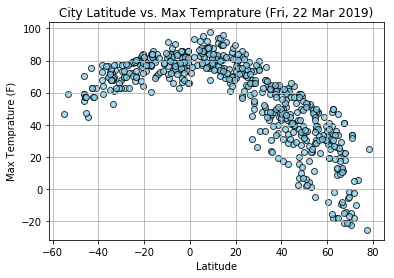

In [6]:

# Build a scatter plot for each data type
plt.scatter(csv_city_data_df['Lat'], csv_city_data_df['MaxTemp'], marker="o", facecolors= 'skyblue', edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Max Temprature (Fri, 22 Mar 2019)")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("City Latitude vs. Max Temprature.png")

# Show plot
plt.show()

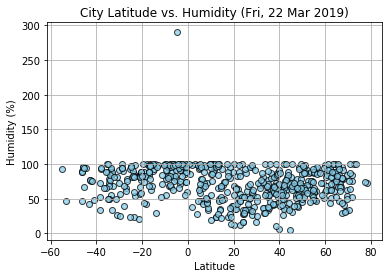

In [7]:
# Build a scatter plot for each data type
plt.scatter(csv_city_data_df['Lat'], csv_city_data_df['Humidity'], marker="o", facecolors= 'skyblue', edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Fri, 22 Mar 2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Humidity.png")

# Show plot
plt.show()

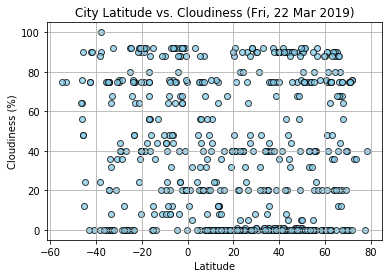

In [8]:
# Build a scatter plot for each data type
plt.scatter(csv_city_data_df['Lat'], csv_city_data_df['Cloudiness'], marker="o", facecolors= 'skyblue', edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Fri, 22 Mar 2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

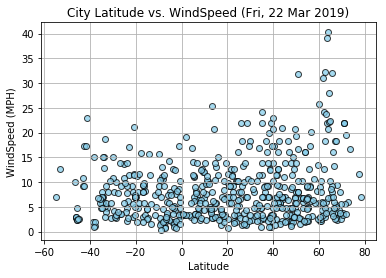

In [9]:
# Build a scatter plot for each data type
plt.scatter(csv_city_data_df['Lat'], csv_city_data_df['WindSpeed'], marker="o", facecolors= 'skyblue', edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. WindSpeed (Fri, 22 Mar 2019)")
plt.ylabel("WindSpeed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. WindSpeed.png")

# Show plot
plt.show()